1. Launch a new python notebook and read the data set. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

In [6]:
import pandas as pd
import numpy as np
cars = pd.read_csv("cars-dataset.csv")

In [7]:
cars.head()

car name  cyl   disp   hp    wt   acc  yr   mpg
0  chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1          buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2         plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3              amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                ford torino    8  302.0  140  3449  10.5  70  17.0

In [8]:
cars.describe().transpose() 

count         mean         std     min       25%     50%       75%  \
cyl   398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp  398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt    398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc   398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr    398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
mpg   398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   

         max  
cyl      8.0  
disp   455.0  
wt    5140.0  
acc     24.8  
yr      82.0  
mpg     46.6

In [9]:
temp = pd.DataFrame(cars.hp.str.isdigit()) 
temp[temp['hp'] == False]

hp
32   False
126  False
330  False
336  False
354  False
374  False

In [10]:
cars = cars.replace('?', np.nan)

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [12]:
cars['hp'] = cars['hp'].astype('float64')

In [14]:
numeric_cols = cars.drop('car name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(cars[['car name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
cars = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

C:\Users\swapn\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


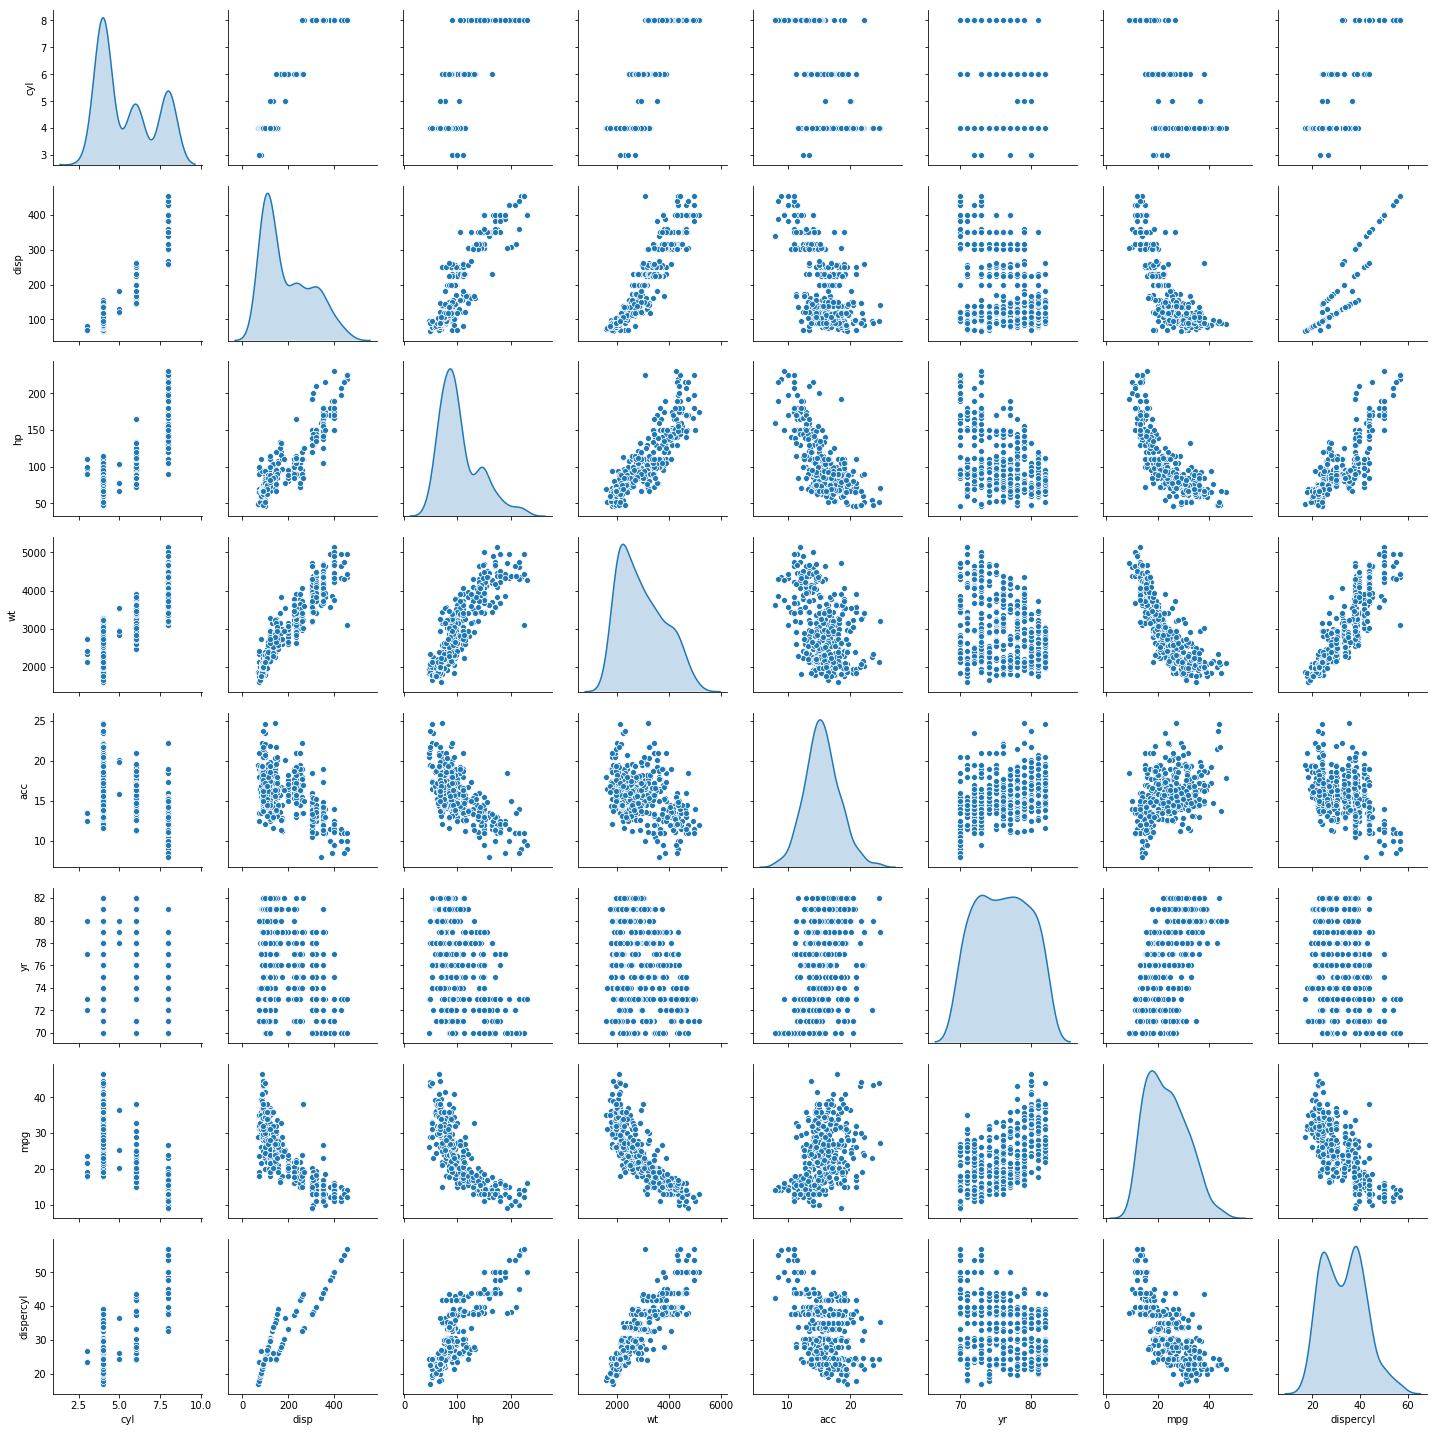

In [17]:
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
car_attr = cars.iloc[:, 0:7]
car_attr['dispercyl'] = car_attr['disp'] / car_attr['cyl']
sns.pairplot(car_attr, diag_kind='kde') 

In [18]:
from scipy.stats import zscore

cars_attr = cars.loc[:, 'cyl':'mpg']
cars_attr_z = cars_attr.apply(zscore)


#mpg_df_attr_z.pop('origin')      # Remove "origin" and "yr" columns
cars_attr_z.pop('yr')

array = cars_attr_z.values

3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

In [20]:
from sklearn.cluster import KMeans
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_attr_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             2      944.289955
1             3      609.265388
2             4      492.519413
3             5      423.323816

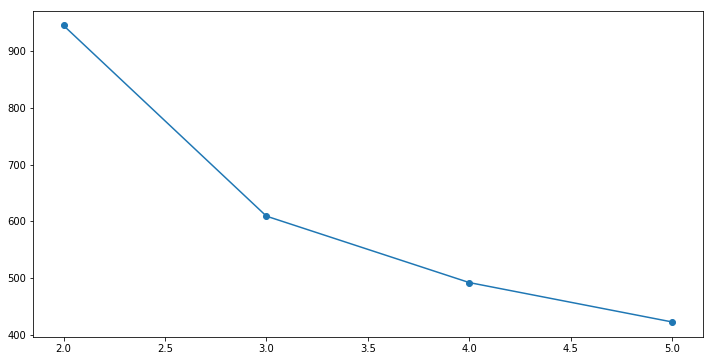

In [21]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [22]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(cars_attr_z)
cars_attr_z_copy = cars_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [23]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.4860546 ,  1.48450715,  1.50624078,  1.38753374, -1.06267868,
        -1.15110476],
       [-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.75394661],
       [ 0.34598334,  0.23689416, -0.06773972,  0.29795187,  0.30089004,
        -0.47244453]])

In [24]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_attr_z) )
centroid_df

cyl      disp        hp        wt       acc       mpg
0  1.486055  1.484507  1.506241  1.387534 -1.062679 -1.151105
1 -0.853477 -0.803214 -0.675062 -0.785499  0.361334  0.753947
2  0.345983  0.236894 -0.067740  0.297952  0.300890 -0.472445

In [25]:
prediction=cluster.predict(cars_attr_z)
cars_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [28]:
cars_attr_z

cyl      disp        hp        wt       acc       mpg  GROUP
0    1.498191  1.090604  0.673118  0.630870 -1.295498 -0.706439      0
1    1.498191  1.503514  1.589958  0.854333 -1.477038 -1.090751      0
2    1.498191  1.196232  1.197027  0.550470 -1.658577 -0.706439      0
3    1.498191  1.061796  1.197027  0.546923 -1.295498 -0.962647      0
4    1.498191  1.042591  0.935072  0.565841 -1.840117 -0.834543      0
5    1.498191  2.262118  2.454408  1.620492 -2.021656 -1.090751      0
6    1.498191  2.502182  3.030708  1.635863 -2.384735 -1.218855      0
7    1.498191  2.367746  2.899730  1.586204 -2.566274 -1.218855      0
8    1.498191  2.511784  3.161685  1.719809 -2.021656 -1.218855      0
9    1.498191  1.887617  2.244844  1.039961 -2.566274 -1.090751      0
10   1.498191  1.820399  1.720935  0.700628 -2.021656 -1.090751      0
11   1.498191  1.407489  1.458981  0.755016 -2.747814 -1.218855      0
12   1.498191  1.983643  1.197027  0.934732 -2.203196 -1.090751      0
13   1.498191  2.511784  3.161685  0.136650 -2.021656 -1.218855      0
14  -0.856321 -0.772295 -0.243723 -0.707544 -0.206262  0.062185      1
15   0.320935  0.043923 -0.243723 -0.162483 -0.024722 -0.194023      2
16   0.320935  0.053526 -0.191332 -0.232242 -0.024722 -0.706439      2
17   0.320935  0.063128 -0.505677 -0.453340  0.156817 -0.322127      2
18  -0.856321 -0.925936 -0.427091 -0.993671 -0.387801  0.446497      1
19  -0.856321 -0.925936 -1.527300 -1.342463  1.790672  0.318393      1
20  -0.856321 -0.801103 -0.453287 -0.352841  0.701436  0.190289      1
21  -0.856321 -0.829911 -0.374700 -0.638968 -0.387801  0.062185      1
22  -0.856321 -0.858718 -0.243723 -0.703997  0.701436  0.190289      1
23  -0.856321 -0.695475  0.227795 -0.870708 -1.113959  0.318393      1
24   0.320935  0.053526 -0.374700 -0.381217 -0.206262 -0.322127      2
25   1.498191  1.599540  2.899730  1.944455 -0.569341 -1.731270      0
26   1.498191  1.090604  2.506799  1.661874 -0.206262 -1.731270      0
27   1.498191  1.196232  2.768753  1.668968 -0.750880 -1.603167      0
28   1.498191  1.061796  2.323431  2.082789  1.064514 -1.859374      0
29  -0.856321 -0.925936 -0.427091 -0.993671 -0.387801  0.446497      1
..        ...       ...       ...       ...       ...       ...    ...
368 -0.856321 -0.781898 -0.427091 -0.390676  1.100822  0.446497      1
369 -0.856321 -0.781898 -0.427091 -0.680350  0.882975  1.343225      1
370 -0.856321 -0.781898 -0.505677 -0.467528  0.229433  0.958913      1
371 -0.856321 -0.561039 -0.531873 -0.526645  0.156817  0.702705      1
372 -0.856321 -0.407398 -0.374700 -0.278353  0.882975  0.446497      1
373 -0.856321 -0.513026 -0.322309 -0.124648  0.302049  0.062185      1
374 -0.856321 -0.407398 -0.283016  0.076350  1.790672 -0.065919      1
375 -0.856321 -0.849116 -0.793827 -1.171023 -0.097338  1.599433      1
376 -0.856321 -0.983552 -0.951000 -1.117818  0.955591  1.727537      1
377 -0.856321 -0.983552 -0.951000 -1.182846  0.737743  0.958913      1
378 -0.856321 -0.849116 -1.081977 -0.999583 -0.315185  1.855641      1
379 -0.856321 -0.916334 -0.898609 -0.999583  0.628820  1.599433      1
380 -0.856321 -0.705077 -0.427091 -0.958201 -0.387801  1.599433      1
381 -0.856321 -0.829911 -0.767632 -0.904996 -0.387801  1.599433      1
382 -0.856321 -0.820308 -0.898609 -0.857702  0.483588  1.343225      1
383 -0.856321 -0.983552 -0.977195 -1.188758 -0.206262  1.855641      1
384 -0.856321 -0.983552 -0.977195 -1.188758  0.047894  1.087017      1
385 -0.856321 -0.983552 -0.977195 -1.153288  0.229433  1.855641      1
386  0.320935 -0.119320  0.149209 -0.030061  0.302049  0.190289      2
387  0.320935  0.658488 -0.505677  0.052703  0.519896  1.855641      1
388 -0.856321 -0.359385 -0.322309 -0.455705 -0.387801  0.318393      1
389  0.320935  0.370411  0.201600 -0.160119 -0.315185 -0.194023      2
390 -0.856321 -0.474616 -0.217527 -0.361117 -0.605648  1.087017      1
391 -0.856321 -0.561039 -0.531873 -0.709909 -0.932419  1.599433      1
392 -0.856321 -0.407398 -0.374700 

4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [44]:
from sklearn.linear_model import LinearRegression
Model0 = LinearRegression()

In [36]:
cluster0 = cars_attr_z.loc[cars_attr_z["GROUP"]==0,]
cluster1 = cars_attr_z.loc[cars_attr_z["GROUP"]==1,]
cluster2 = cars_attr_z.loc[cars_attr_z["GROUP"]==2,]

In [41]:
temp=cluster0.drop('mpg', axis=1)
X = temp.drop('GROUP', axis=1)

In [42]:
y= cluster0['mpg']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:

Model0.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
Model0.predict(x_test)

array([-1.33301237, -1.11204993, -1.23727549, -1.00741987, -1.18924102,
       -1.48904405, -1.20335442, -0.95684237, -1.06872318, -1.25188091,
       -1.18481582, -0.76802073, -1.11527982, -1.18984676, -1.04420391,
       -1.1420372 , -0.9346347 , -1.01930054, -0.9670918 , -0.92059891,
       -1.00622323, -1.21504976, -1.32234052, -1.21990285, -0.92979876,
       -1.24171522, -1.02973414, -1.19596267, -0.96933162, -1.21661103])

In [47]:
Model0.coef_

array([-0.38594651,  0.14322956, -0.25030629, -0.1941371 , -0.0671942 ])

In [48]:
Model1 = LinearRegression()
temp=cluster1.drop('mpg', axis=1)
X1 = temp.drop('GROUP', axis=1)
y1= cluster1['mpg']
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)
Model1.fit(x_train, y_train)
Model1.predict(x_test)
Model1.coef_

array([ 1.11015856, -0.16286597, -0.85575272, -0.41037807, -0.04416438])

In [50]:
Model2 = LinearRegression()
temp=cluster2.drop('mpg', axis=1)
X2 = temp.drop('GROUP', axis=1)
y2= cluster2['mpg']
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=1)
Model2.fit(x_train, y_train)
Model2.predict(x_test)
Model2.coef_

array([ 0.38985757, -0.2834247 ,  0.18993014, -0.43142845,  0.00519737])